##1. Осьминог Пауль

Имея результаты предсказаний, можно составить соответствующее Биномиальное распределение c p = 0.5 (вероятность угадывания)

In [ ]:
Bin = [1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
# где 0 - неверное предсказание, 1 - верное предсказание 
alpha = 0.05
# уровень значимости

One-tailed hypothesis:

$H_0$ (нулевая гипотеза): $p \le$ 0.5, тогда выбор осьминога оказался случайным

$H_1$ (альтернативная гипотеза): $p >$ 0.5, тогда осьминог Пауль и правда оказался талантливым экстрасенсом со способностями к предсказаниям

P.S. ошибка 1-го рода: $\alpha$ = 0.05 (уровень значимости)

In [ ]:
from scipy import stats

In [ ]:
# имея 13 предсказаний на исход матчей и вероятность угадывания 0.5
p_value = stats.binom_test(sum(Bin), 13, 0.5, alternative = 'greater')
print(p_value)

0.01123046875


In [ ]:
if p_value < alpha:
    print("Вердикт: Reject H_0")
else:
    print("Вердикт: Do not reject H_0") 

Вердикт: Reject H_0


Поскольку мы отвергаем нулевую гипотезу $H_0$, получив $p$ = 0.01, что говорит о том, что $p >$  0.5. Поэтому, мы видим, что осьминог Пауль действительно оказался талантливым экстрасенсом со способностями к предсказаниям, угадав исход 11/13 матчей сборной Германии по футболу. 

##2. Корм и котики

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/V-Marco/public_intro_to_DS_mba_hse/main/HW/HW3/banner_click_stat.csv", header = None, sep = '\t')

In [ ]:
df.shape

(1000, 2)

In [ ]:
df.columns = ['banner_1', 'banner_2']
df

,banner_1,banner_2
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
995,0,0
996,0,0
997,0,0
998,0,0


Описательная статистика

In [ ]:
df.describe()

,banner_1,banner_2
count,1000.000000,1000.000000
mean,0.037000,0.053000
std,0.188856,0.224146
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


Использование метода оценки вероятности совокупности по вероятности выборки, когда вероятность следует биномиальному распределению.

Итак, мы получаем диапазон вероятностей с ожидаемым доверительным интервалом.

source: https://github.com/Filareth2015/DA_and_ML_Python_Basics

In [ ]:
import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

conf_interval_banner_1 = proportion_confint(sum(df.banner_1), 
                                            df.shape[0],
                                            method = 'wilson')
conf_interval_banner_2 = proportion_confint(sum(df.banner_2), 
                                            df.shape[0],
                                            method = 'wilson')

Интервальные оценки долей: 

In [ ]:
print ('interval for the first banner 1 [%f, %f]' % conf_interval_banner_1)
print ('interval for the second banner 2 [%f, %f]' % conf_interval_banner_2)

interval for the first banner 1 [0.026961, 0.050582]
interval for the second banner 2 [0.040747, 0.068675]


###Сравнение

Независимые выборки: CI для разности долей

In [ ]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [ ]:
print ("CI: [%f, %f]" % proportions_confint_diff_ind(df.banner_1, df.banner_2))

CI: [-0.034157, 0.002157]


Связанные выборки: CI для разности долей

In [ ]:
# got an ERROR: https://stackoverflow.com/questions/31011631/python-2-3-object-of-type-zip-has-no-len
def proportions_confint_diff_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2))
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

In [ ]:
print ("CI: [%f, %f]" % proportions_confint_diff_rel(df.banner_1, df.banner_2))

CI: [-0.026689, -0.005311]


Вывод: оба баннера выбирают одинаково часто

Также можем провести two-tailed hypothesis testing

$H_0$ (нулевая гипотеза): $ \mu_1 = \mu_2$, тогда оба баннера одинаково хороши

$H_1$ (альтернативная гипотеза): $ \mu_1 ≠ \mu_2$, тогда оба баннера не одинаковы

P.S. ошибка 1-го рода: $\alpha$ = 0.05 (уровень значимости) 

In [ ]:
# T-test for the means of two independent samples
p_value = stats.ttest_ind(df.banner_1, df.banner_2)
print(p_value.pvalue)

0.0844572354225637


In [ ]:
if p_value.pvalue < alpha:
    print("Вердикт: Reject H_0")
else:
    print("Вердикт: Do not reject H_0") 

Вердикт: Do not reject H_0


Поскольку мы не отвергаем нулевую гипотезу $H_0$, получив $\mu$ = 0.08, что говорит о том, что $ \mu_1 = \mu_2$. Поэтому, мы видим, что среднее значение лайков по обеим баннерам одинаково, значит оба баннера одинаково хороши.

##3. Немного АВ-тестов
## Игра Cookie Cat

У создателей появляется важный вопрос: **где лучше всего ставить ворота?**
Первоначально первые ворота были размещены на уровне 30. Однако есть гипотеза, что лучше переместить их на уровень 40. В этом задании вам предлагается проанализировать результаты AB-теста, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. 

**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - вернулся ли игрок в игру через 1 день после установки
* `retention_7` - вернулся ли игрок в игру через 7 дней после установки

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/V-Marco/public_intro_to_DS_mba_hse/main/HW/HW3/cookie_cats.csv")
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [ ]:
# кол-во игроков в каждой AB группе
df.groupby('version')['userid'].count()

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64

видно, что кол-во игроков в каждой группе практически одинаковое, что очень хорошо

### Вопрос 1: есть ли зависимость между возвращаемостью игроков и расположением ворот?

Text(0, 0.5, 'User Count')

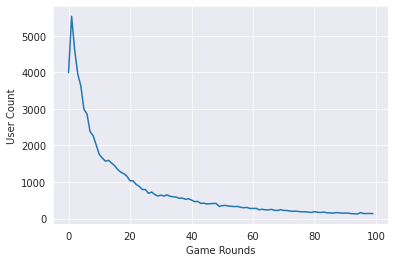

In [ ]:
%matplotlib inline

# Counting the number of players for each number of game rounds 
plot_df = df.groupby('sum_gamerounds')['userid'].count()

# распределение игроков от 0 до 100 раундов
ax = plot_df.head(n = 100).plot(x = "sum_gamerounds", y = "userid")
ax.set_xlabel("Game Rounds")
ax.set_ylabel("User Count")

Видно, что некоторые игроки устанавливают игру, но потом никогда в неё не играют (имея 0 игровых раундов), некоторые игроки просто играют пару игровых раундов в первую неделю, а некоторые по-настоящему увлекаются и им интересна эта игра.

#### 1.1 Проверьте гипотезу для возвращения через день

Чем выше показатель удержания в течение 1 дня, тем легче удержать игроков и создать большую базу игроков.

In [ ]:
# % игроков, кто вернулся после скачиваания игры 
df['retention_1'].sum() / df['retention_1'].count()

0.4452095044850259

Итак, чуть меньше половины игроков возвращаются через день после установки игры. Теперь, когда у нас есть эталон, давайте посмотрим, как отличается 1-дневное удержание между двумя группами AB.

In [ ]:
# 1-day retention для каждой AB-группы
df.groupby('version')['retention_1'].sum() / df.groupby('version')['userid'].count()

version
gate_30    0.448188
gate_40    0.442283
dtype: float64

Похоже, что произошло небольшое снижение 1-дневного удержания, когда ворота были перемещены на уровень 40 (44,2%) по сравнению с контролем, когда они были на уровне 30 (44,8%). Это небольшое изменение, но даже небольшие изменения в удержании могут оказать большое влияние.

two-tailed hypothesis testing 

$H_0$ (нулевая гипотеза): $ \mu_1 (control) = \mu_2 (test)$, тогда возвращение игроков контрольной и тестовой группы не различается (через день)

$H_1$ (альтернативная гипотеза): $ \mu_1 (control) ≠ \mu_2 (test)$, тогда возвращение игроков контрольной и тестовой группы различается (через день)

P.S. ошибка 1-го рода: $\alpha$ = 0.05 (уровень значимости) 

In [ ]:
df_g30 = df.query('version == "gate_30"')
df_g40 = df.query('version == "gate_40"')

In [ ]:
# T-test for the means of two independent samples
p_value = stats.ttest_ind(df_g30['retention_1'], df_g40['retention_1'])
print(p_value.pvalue)

0.07441111525563184


In [ ]:
if p_value.pvalue < alpha:
    print("Вердикт: Reject H_0")
else:
    print("Вердикт: Do not reject H_0") 

Вердикт: Do not reject H_0


Поскольку, нулевая гипотеза не отвергается, $ \mu_1 (control) = \mu_2 (test)$, тогда возвращение игроков контрольной и тестовой группы не различается (через день), что говорит об одинаковом среднем количестве возвратов за игру.

##Extra outcome:

Ниже представлены два распределения, которые представляют собой неопределенность бутстрапа в отношении того, каким может быть базовое 1-дневное удержание для двух AB-групп. Мы видим, что есть некоторые свидетельства разницы, хотя и небольшой.

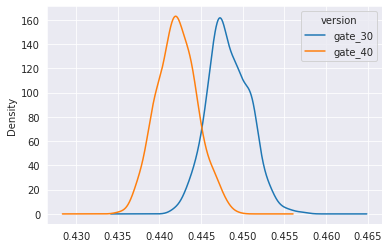

In [ ]:
# создаем list с бутстрапированным средними для каждой AB-группы
boot_1d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# переносим list в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# график bootstrap распределений
boot_1d.plot(kind = 'kde')

Text(0.5, 0, '% difference in means')

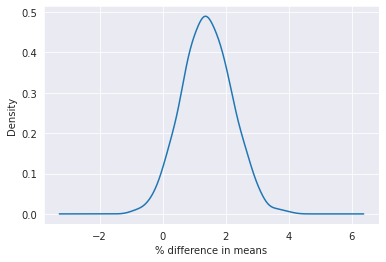

In [ ]:
# добавляем колонку с % разницей между двумя AB-группами
boot_1d['diff'] = (boot_1d['gate_30'] - boot_1d['gate_40']) /  boot_1d['gate_40'] * 100

# строим bootstrap % разницу
ax = boot_1d['diff'].plot(kind = 'kde')
ax.set_xlabel("% difference in means")

Из графика выше можно заметить, что наиболее вероятная разница в процентах составляет около 1-2%, большая часть распределения выше 0% в пользу ворот на уровне 30.

Вероятность того, что разница превысит 0%?

In [ ]:
# probability that 1-day retention 
# is greater when the gate is at level 30.
prob = (boot_1d['diff'] > 0).sum() / len(boot_1d)

# probability
'{:.1%}'.format(prob)

'96.6%'

Вероятность того, что разница превысит 1%?

In [ ]:
# Calculating the probability that 1-day retention 
# is greater when the gate is at level 30.
prob = (boot_1d['diff'] > 1).sum() / len(boot_1d)

# Pretty printing the probability
'{:.1%}'.format(prob)

'69.8%'

Вероятность того, что разница превысит 2%?

In [ ]:
# Calculating the probability that 1-day retention 
# is greater when the gate is at level 30.
prob = (boot_1d['diff'] > 2).sum() / len(boot_1d)

# Pretty printing the probability
'{:.1%}'.format(prob)

'23.6%'

#### 2.2 Проверьте гипотезу для возвращения через 7 дней

Анализ бутстрапа показывает, что существует высокая вероятность того, что 1-дневное удержание лучше, когда ворота находятся на уровне 30. Однако, поскольку игроки играют в игру всего один день, вполне вероятно, что большинство игроков еще не достигли 30-го уровня. То есть многие игроки не будут затронуты вратами, даже если они уже достигли 30-го уровня.

Вероятно, что после игры в течение недели еще больше игроков должны будут достичь 40-го уровня.

In [ ]:
# 7-day retention для обеих AB-групп
df.groupby('version')['retention_7'].sum() / df.groupby('version')['userid'].count()

version
gate_30    0.190201
gate_40    0.182000
dtype: float64

Видно, что 7-дневное удержание немного ниже (18.2%), когда ворота находятся на уровне 40, чем когда ворота находятся на уровне 30 (19.0%). Эта разница также больше, чем при 1-дневном удержании, вероятно, потому что больше игроков успели поразить первые ворота. Также общее 7-дневное удержание ниже, чем общее 1-дневное удержание. То есть, меньше людей играют в игру через неделю после установки, чем через день после установки.

two-tailed hypothesis testing 

$H_0$ (нулевая гипотеза): $ \mu_1 (control) = \mu_2 (test)$, тогда возвращение игроков контрольной и тестовой группы не различается (через неделю)

$H_1$ (альтернативная гипотеза): $ \mu_1 (control) ≠ \mu_2 (test)$, тогда возвращение игроков контрольной и тестовой группы различается (через неделю)

P.S. ошибка 1-го рода: $\alpha$ = 0.05 (уровень значимости)

In [ ]:
df_g30 = df.query('version == "gate_30"')
df_g40 = df.query('version == "gate_40"')

In [ ]:
# T-test for the means of two independent samples
p_value = stats.ttest_ind(df_g30['retention_7'], df_g40['retention_7'])
print(p_value.pvalue)

0.0015540151201088365


In [ ]:
if p_value.pvalue < alpha:
    print("Вердикт: Reject H_0")
else:
    print("Вердикт: Do not reject H_0")

Вердикт: Reject H_0


Здесь же ситуация зеркальная, поскольку нулевая гипотеза отвергается, $ \mu_1 (control) ≠ \mu_2 (test)$, тогда возвращение игроков контрольной и тестовой группы различается (через неделю), что говорит о разном среднем количестве возвратов за игру.

'100.0%'

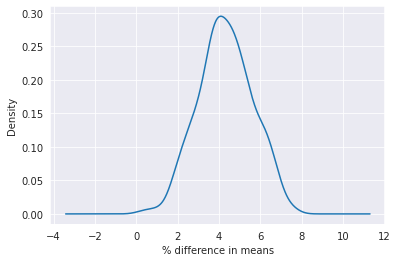

In [ ]:
# создаем list с бутстрапированным средними для каждой AB-группы
boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    
# переносим list в DataFrame
boot_7d = pd.DataFrame(boot_7d)

# добавляем колонку с % разницей между двумя AB-группами
boot_7d['diff'] = (boot_7d['gate_30'] - boot_7d['gate_40']) /  boot_7d['gate_30'] * 100

# строим bootstrap % разницу
ax = boot_7d['diff'].plot(kind = 'kde')
ax.set_xlabel("% difference in means")

#  probability that 7-day retention is greater when the gate is at level 30
prob = (boot_7d['diff'] > 0).sum() / len(boot_7d)

# probability
'{:.1%}'.format(prob)

Итак, бутстрап утверждает, что есть доказательства того, что 7-дневное удержание выше, когда ворота находятся на уровне 30, чем когда они находятся на уровне 40.

Вывод: Если мы хотим сохранить удержание на высоком уровне — как 1-дневное, так и 7-дневное удержание — мы не должны перемещать ворота с уровня 30 на уровень 40.

Заставляя игроков делать перерыв, когда они достигают ворот, они получают больше удовольствия от игры. Но когда ворота перемещаются на 40-й уровень, меньшему количеству игроков удается пройти достаточно далеко, и они с большей вероятностью выйдут из игры, потому что им это просто наскучило.

### Вопрос 2: Отличается ли среднее количество раундов в группах gate_40 и gate_30?

In [ ]:
# для начала проверим себя
(df.groupby('version')['sum_gamerounds'].mean().round(3) * 100)

version
gate_30    5245.6
gate_40    5129.9
Name: sum_gamerounds, dtype: float64

Видно, что среднее количество раундов в группах gate_40 и gate_30 отличается примерно на 116

In [ ]:
p_value = stats.ttest_ind(df_g30['sum_gamerounds'], df_g40['sum_gamerounds'])
print(p_value.pvalue)

0.37290868247405207


In [ ]:
if p_value.pvalue < alpha:
    print("Вердикт: Reject H_0")
else:
    print("Вердикт: Do not reject H_0")

Вердикт: Do not reject H_0


### Вопрос 3: Отличается ли медианное количество раундов в группах gate_40 и gate_30?

In [ ]:
# для начала проверим себя
(df.groupby('version')['sum_gamerounds'].median().round(3) * 100)

version
gate_30    1700.0
gate_40    1600.0
Name: sum_gamerounds, dtype: float64

Видно, что медианное количество раундов в группах gate_40 и gate_30 отличается на 100

In [ ]:
df_g30 = df.query('version == "gate_30"')
df_g40 = df.query('version == "gate_40"')

In [ ]:
p_value = stats.median_test(df_g30['sum_gamerounds'], df_g40['sum_gamerounds'])
print(p_value[1])

0.011310113730407696


In [ ]:
if p_value[1] < alpha:
    print("Вердикт: Reject H_0")
else:
    print("Вердикт: Do not reject H_0")

Вердикт: Reject H_0


## Задача 4: Время покемонов

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/V-Marco/public_intro_to_DS_mba_hse/main/HW/HW3/pokemon.csv")
df.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        800 non-null    int64 
 1   Name       799 non-null    object
 2   Class 1    800 non-null    object
 3   Class 2    414 non-null    object
 4   HP         800 non-null    int64 
 5   Attack     800 non-null    int64 
 6   Defense    800 non-null    int64 
 7   Sp. Atk    800 non-null    int64 
 8   Sp. Def    800 non-null    int64 
 9   Speed      800 non-null    int64 
 10  Legendary  800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pid,800.0,400.50000,231.084400,1.0,200.75,400.5,600.25,800.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0


In [ ]:
print(df.isnull().sum()[df.columns[df.isnull().any()]])
print("Total Missing values : ",df.isna().sum().sum())

Name         1
Class 2    386
dtype: int64
Total Missing values :  387


In [ ]:
df["Class"] = df["Class 1"].astype(str) +' ' + df["Class 2"]
df['Class']

0       Grass Poison
1       Grass Poison
2       Grass Poison
3       Grass Poison
4                NaN
           ...      
795       Rock Fairy
796       Rock Fairy
797    Psychic Ghost
798     Psychic Dark
799       Fire Water
Name: Class, Length: 800, dtype: object

In [ ]:
df['Class 2'].isnull().sum()

386

In [ ]:
valc_class1 = df['Class 1'].value_counts()
valc_class2 = df['Class 2'].value_counts()
classes_df = pd.concat([valc_class1,valc_class2],axis=1)

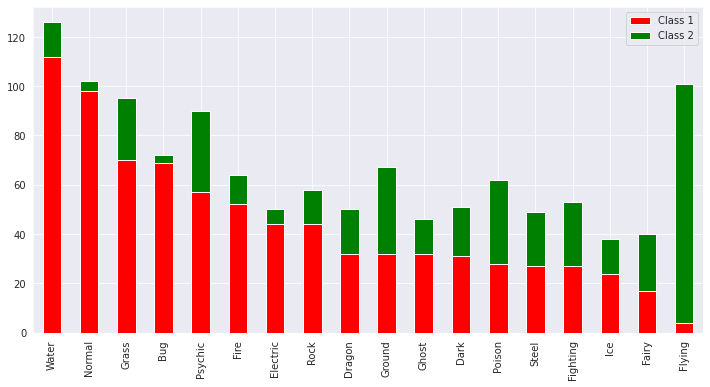

In [ ]:
classes_df.plot(kind='bar',stacked=True, color=['red', 'green'],figsize=(12,6))

Рассмотрим топ-15 классов покемонов чей 'Class 2' не пустой

In [ ]:
class_top15 = df[~df['Class 2'].isnull()]["Class"].value_counts()[:15]

Text(0.5, 1.0, 'Most Common Type Combinations')

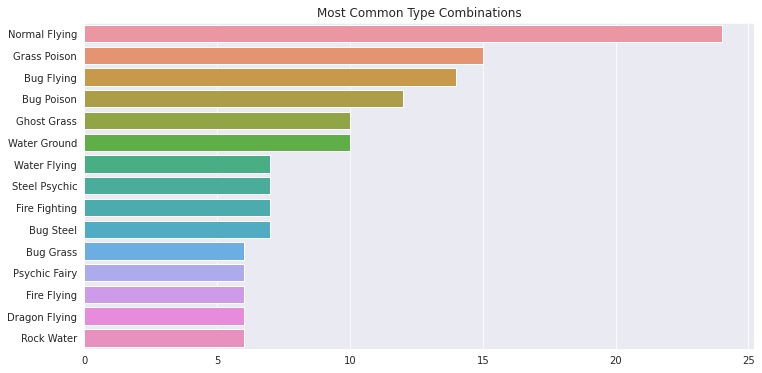

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

plt.figure(figsize=(12,6))
ax = sns.barplot(y = class_top15.index,x = class_top15.values)
ax.set_title("Most Common Type Combinations")

##Вопрос 1.

Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически. 

one-tailed hypothesis testing 

$H_0$ (нулевая гипотеза): $ \mu_1 (grass) = \mu_2 (rock)$, тогда обычные атаки покемонов в этих двух классах не различаются 

$H_1$ (альтернативная гипотеза): $ \mu_1 (grass) > \mu_2 (rock)$, тогда обычная атака покемонов `grass` значительно сильнее, чем у `rock`

P.S. ошибка 1-го рода: $\alpha$ = 0.05 (уровень значимости)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/V-Marco/public_intro_to_DS_mba_hse/main/HW/HW3/pokemon.csv")
df.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [ ]:
df_grass = df[df["Class 1"] == 'Grass']
df_rock = df[df["Class 1"] == 'Rock']

In [ ]:
!pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# имея разные variance
p_value = stats.ttest_ind(df_grass['Attack'], df_rock['Attack'], alternative='greater', equal_var=False)
print(p_value.pvalue)

0.9989896717530655


In [ ]:
if p_value.pvalue < alpha:
    print("Вердикт: Reject H_0")
else:
    print("Вердикт: Do not reject H_0")

Поскольку мы не отвергаем нулевую гипотезу, $ \mu_1 (grass) = \mu_2 (rock)$, тогда обычные атаки покемонов в этих двух классах не различаются, другими словами, покемоны в классе `grass` имеют такую же сильную обычную атаку, как и покемоны в классе `rock`. Также значение $p$ может говорить о том, что сильная обычная атака у покемонов `grass` может быть и значительно меньше, чем у класса `rock`.

##Вопрос 2.

Также профессор Оук очень хочет проверить, правда ли нет значимой разницы между силой обычной атаки и силой обычной защиты у покемонов. Помогите ему и ответьте на вопрос, подтвердив свои выводы с помощью проверки статистических гипотез

two-tailed hypothesis testing 

$H_0$ (нулевая гипотеза): $ \mu_1 (attack) = \mu_2 (defense)$, тогда силы обычной атаки и силы обычной защиты не различаются

$H_1$ (альтернативная гипотеза): $ \mu_1 (attack) ≠ \mu_2 (defense)$, тогда силы обычной атаки и силы обычной защиты различаются

P.S. ошибка 1-го рода: $\alpha$ = 0.05 (уровень значимости)

In [ ]:
# имея разные variance
p_value = stats.ttest_ind(df['Attack'], df['Defense'], equal_var=False)
print(p_value.pvalue)

0.0012124374824544375


In [ ]:
if p_value.pvalue < alpha:
    print("Вердикт: Reject H_0")
else:
    print("Вердикт: Do not reject H_0")

Вердикт: Reject H_0


Поскольку мы не отвергаем нулевую гипотезу, $ \mu_1 (attack) ≠ \mu_2 (defense)$, тогда силы обычной атаки и силы обычной защиты различаются и также значение $p$ не очень велико.

##Вопрос 3.

И последний вопрос, который мучает профессора Оука: правда ли, что средняя скорость покемонов превышает 66.6 ? Сформулируйте подходящие гипотезы и помогите профессору Оуку, ответив на вопрос.

one-tailed hypothesis testing

$H_0$ (нулевая гипотеза): $ \mu (speed) = 66.6$

$H_1$ (альтернативная гипотеза): $ \mu (speed) > 66.6$

P.S. ошибка 1-го рода: $\alpha$ = 0.05 (уровень значимости)

In [ ]:
speed = [66.6] * len(df['Speed'])

In [ ]:
# имея разные variance
p_value = stats.ttest_ind(df['Speed'], speed, alternative='greater', equal_var=False)
print(p_value.pvalue)

0.05146366754908849


In [ ]:
if p_value.pvalue < alpha:
    print("Вердикт: Reject H_0")
else:
    print("Вердикт: Do not reject H_0")

Вердикт: Do not reject H_0


Поскольку мы не отвергаем нулевую гипотезу, тогда и правда $ \mu (speed) = 66.6$, что говорит о том, что средняя скорость покемонов превышает 66.6, Q.E.D.